<a href="https://colab.research.google.com/github/Rishabh9559/Data_science/blob/main/Phase%202%3A%20Machine%20Learning%20for%20Data%20Science/Decision%20Tree%20/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Lower threshold (e.g., 0.2)
→ Model predicts positive more easily
* More True Positives
* More False Positives
* Fewer False Negatives

### Higher threshold (e.g., 0.8)
Model predicts positive only when very confident
* More True Negatives
* More False Negatives
* Fewer False Positives



Example :

Low threshold → Good for safety-critical tasks (don’t miss positives, like disease detection).

High threshold → Good for avoiding false alarms (spam detection, fraud alerts).

# Decision Tree

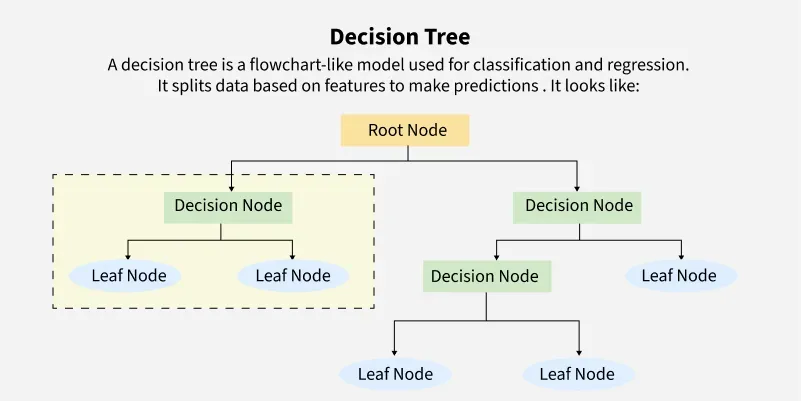


##  What is a Decision Tree?

A **Decision Tree** is a **supervised machine learning algorithm** used for both **classification** and **regression**.

* It works like a **flowchart**:

  * Each **internal node** → represents a condition (feature test).
  * Each **branch** → outcome of the condition.
  * Each **leaf node** → final prediction (class label or value).


##  Types of Decision Trees

1. **Classification Trees**

   * Target variable is **categorical** (Yes/No, Fraud/Not Fraud, Spam/Not Spam).
   * Example: Predict if a customer will buy a product (Yes/No).

2. **Regression Trees**

   * Target variable is **continuous** (numbers).
   * Example: Predict house price (\$250,000, \$500,000, etc.).

3. **Categorical Variable Decision Tree**

   * Handles categorical features (like Color = Red/Blue/Green).

4. **Continuous Variable Decision Tree**

   * Handles continuous features (like Age, Salary).



##  How It Works (Simple Example)

Imagine a bank wants to decide if they should **approve a loan**.
The decision tree might look like:

```
             [Income > 50K?]
                /       \
             Yes          No
            /              \
   [Credit Score > 700?]    Reject Loan
       /        \
     Yes         No
   Approve      Reject
```

* If Income > 50K and Credit Score > 700 → **Approve**
* Otherwise → **Reject**



##  Real-World Examples

1. **Healthcare** → Predict whether a patient has diabetes based on age, BMI, glucose levels.
2. **Finance** → Decide whether to approve/deny a loan or credit card.
3. **E-commerce** → Recommend products based on browsing & purchase history.
4. **Manufacturing** → Predict machine failure based on temperature, vibration, pressure.
5. **Education** → Predict whether a student will pass/fail based on study hours, attendance.



 **Why are Decision Trees popular?**

* Easy to visualize & interpret.
* Mimics human decision-making.
* Can be used as a base for **Random Forests** & **Gradient Boosted Trees**.






---

#  1. Information Gain (Entropy Based)

###  Entropy Formula

Entropy measures impurity or disorder:

$$
Entropy(S) = - \sum_{i=1}^{c} p_i \log_2(p_i)
$$

* $p_i$ = probability of class $i$

* $c$ = number of classes

* **Entropy = 0** → Pure (all samples same class)

* **Entropy = 1** → Maximum disorder (50/50 mix in binary)



###  Information Gain Formula

Measures reduction in entropy after splitting on a feature:

$$
IG(S, A) = Entropy(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} \cdot Entropy(S_v)
$$

* $S$ = dataset
* $A$ = feature
* $S_v$ = subset where feature $A = v$

The feature with the **highest Information Gain** is chosen.



###  Example (Information Gain)

Dataset: Predict if a person buys a computer.

| Student | Buys? |
| ------- | ----- |
| Yes     | Yes   |
| Yes     | Yes   |
| No      | No    |
| No      | No    |
| No      | Yes   |

* Total = 5 → (3 Yes, 2 No)
* Entropy(S) = $-\frac{3}{5}\log_2\frac{3}{5} - \frac{2}{5}\log_2\frac{2}{5}$
  \= 0.971

Split by **Student**:

* Student = Yes → {Yes, Yes} → Entropy = 0
* Student = No → {No, No, Yes} → Entropy = 0.918

Weighted entropy = (2/5 × 0) + (3/5 × 0.918) = 0.550

$$
IG = 0.971 - 0.550 = 0.421
$$

So, “Student” is a good feature to split.

## Range of Gain be -
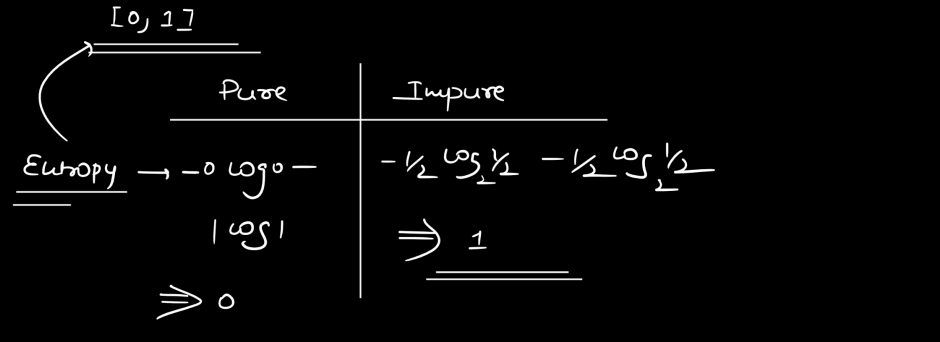

---

#  2. Gini Index

###  Formula

Measures impurity, simpler than entropy:

$$
Gini(S) = 1 - \sum_{i=1}^{c} p_i^2
$$

* $p_i$ = probability of class $i$

* **Gini = 0** → Pure node

* **Higher Gini** → More impurity



###  Example (Gini Index)

Same dataset (3 Yes, 2 No):

$$
Gini(S) = 1 - \Big(\left(\tfrac{3}{5}\right)^2 + \left(\tfrac{2}{5}\right)^2\Big)
= 1 - (0.36 + 0.16) = 0.48
$$

Split by **Student**:

* Student = Yes → {Yes, Yes} → Gini = 0
* Student = No → {No, No, Yes} → Gini = $1 - (2/3)^2 - (1/3)^2 = 0.444$

Weighted Gini = (2/5 × 0) + (3/5 × 0.444) = 0.266

So impurity reduced from 0.48 → 0.266.



 In practice:

* **Entropy/Info Gain** → good when you want **information-theoretic measure**
* **Gini Index** → faster, commonly used in **CART** ( Classification And Regression Tree )

---




#Example for Gini

## Default Gini is the criterion for computationally in Decision Tree

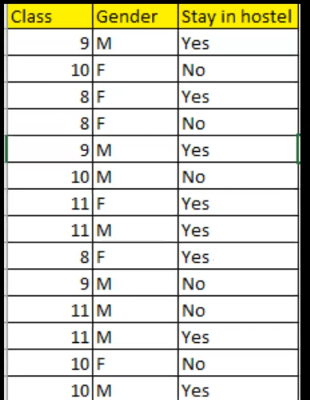

Total sampleod class be = 14

total class 8 student = 3

total class 9 student = 3

total class 10 student = 4

total class 11 student = 4



Gini(class)= { (total class 8 student/total sample class) * (Gini value od class 8) + ...... }

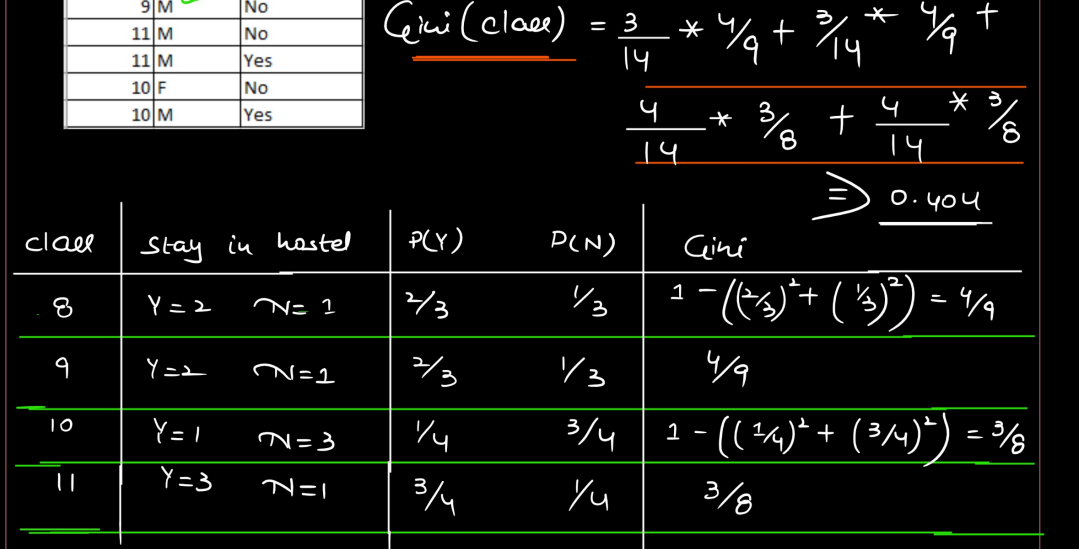

Total Gender sample = 14

Total male = 8

Total female= 6

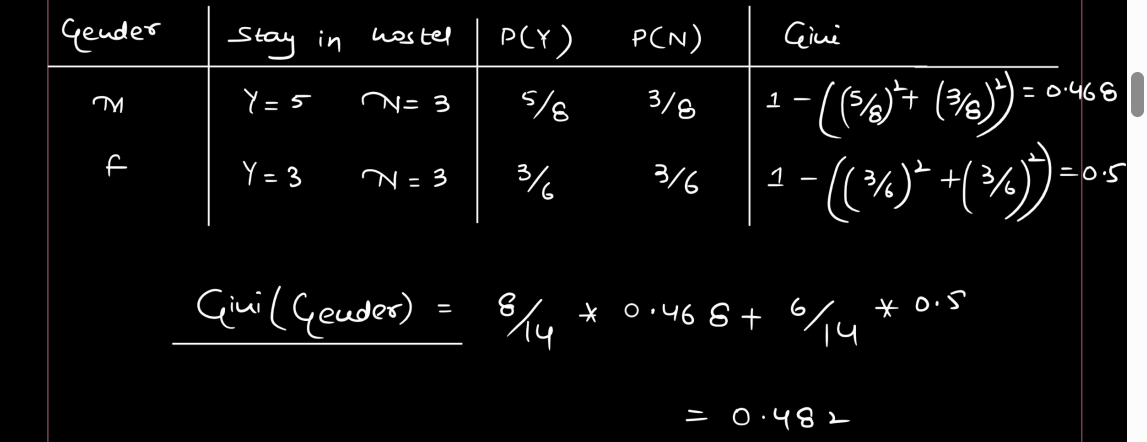

which one have less Gini value , we take that gini value.

Gini(class) = 0.404

Gini (gender) = 0.482

gini value of class be take . If gini value be less then more pure.

Gini range be 0 to 0.5

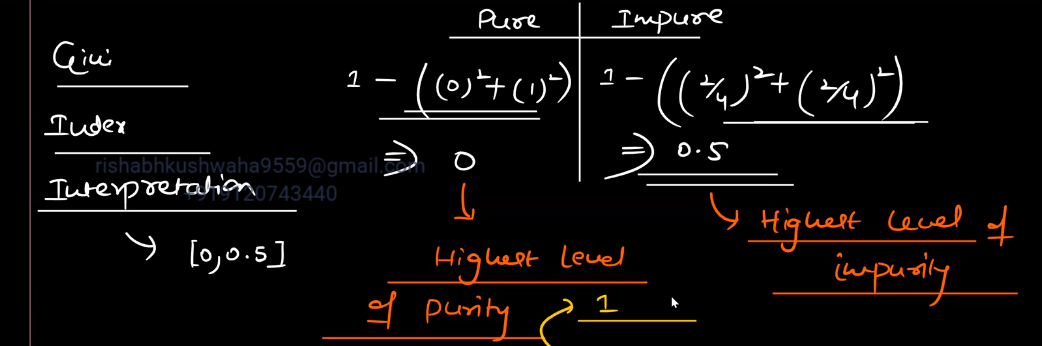